# Decision Tree

In [1]:
import pandas as pd 
import numpy as np #대규모 다차원 배열과 행렬을 지원
from sklearn.tree import DecisionTreeClassifier# skikit-lean은 분유,뢰귀,클러스팅 등을 위한 다양한 도구
from sklearn.model_selection import train_test_split#테스트 집합으로 분할하는 등 모델 선택을 위한 다양한 함수 제공
from sklearn import metrics #sklearn 머신 러닝 모델의 성능을 평가하기 위한 다양한 메트릭이 있음

## https://www.kaggle.com/fredericobreno/play-tennis

## 데이터 불러오기

In [2]:
df = pd.read_csv("./play_tennis.csv")

In [3]:
print (df)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [4]:
df = df.drop("day", axis=1)

In [5]:
print (df)

     outlook  temp humidity    wind play
0      Sunny   Hot     High    Weak   No
1      Sunny   Hot     High  Strong   No
2   Overcast   Hot     High    Weak  Yes
3       Rain  Mild     High    Weak  Yes
4       Rain  Cool   Normal    Weak  Yes
5       Rain  Cool   Normal  Strong   No
6   Overcast  Cool   Normal  Strong  Yes
7      Sunny  Mild     High    Weak   No
8      Sunny  Cool   Normal    Weak  Yes
9       Rain  Mild   Normal    Weak  Yes
10     Sunny  Mild   Normal  Strong  Yes
11  Overcast  Mild     High  Strong  Yes
12  Overcast   Hot   Normal    Weak  Yes
13      Rain  Mild     High  Strong   No


## 데이터로 Features(X)와 Class(y) 만들기

In [6]:
X = np.array(pd.DataFrame(df ,columns=["outlook", "temp", "humidity", "wind"]))
y = np.array(pd.DataFrame(df, columns=["play"]))

In [7]:
print (X)
print (y)

[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rain' 'Mild' 'High' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Strong']
 ['Overcast' 'Cool' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rain' 'Mild' 'High' 'Strong']]
[['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']]


## Train, Test set 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #트레인과 테스트를 8:2로 나눔

In [9]:
print (X_test)

[['Overcast' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Cool' 'Normal' 'Weak']]


## Decision Tree 선언 및 학습

In [10]:
decision_tree_model = DecisionTreeClassifier() #분류작업에 사용되는 의사 결정 트리 기반 모델
decision_tree_model.fit(X_train, y_train) #훈련데이터를 사용하여 모델을 훈련하기 위해 decision_tree_model 개체에서 fit 매서드 호출
#X_train은 학습을 위한 기능 행렬 또는 입력데이터, y_train은 대상 변수 또는 학습 데이터
y_pred = decision_tree_model(X_test) #

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_45868/4199536793.py", line 2, in <module>
    decision_tree_model.fit(X_train, y_train)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/

## String 형태의 데이터들을 모두 int 형으로 변경해줘야 됨

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [12]:
for feature in df.columns:
    df[feature] = LE.fit_transform(df[feature])

In [13]:
print (df)

    outlook  temp  humidity  wind  play
0         2     1         0     1     0
1         2     1         0     0     0
2         0     1         0     1     1
3         1     2         0     1     1
4         1     0         1     1     1
5         1     0         1     0     0
6         0     0         1     0     1
7         2     2         0     1     0
8         2     0         1     1     1
9         1     2         1     1     1
10        2     2         1     0     1
11        0     2         0     0     1
12        0     1         1     1     1
13        1     2         0     0     0


In [14]:
X = np.array(pd.DataFrame(df ,columns=["outlook", "temp", "humidity", "wind"]))
y = np.array(pd.DataFrame(df, columns=["play"]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy', 
                                             max_features=3, min_samples_leaf=2)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

In [16]:
print (y_pred)

[1 1 1 0 0]


In [17]:
print (y_test)

[[0]
 [0]
 [1]
 [0]
 [1]]


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print (accuracy_score(y_pred, y_test))
print (confusion_matrix(y_test, y_pred))

0.4
[[1 2]
 [1 1]]



## Visualize the Decision Tree result

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.4, 0.5, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

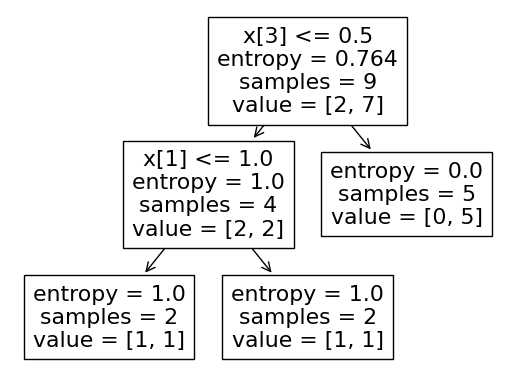

In [19]:
from sklearn import tree
tree.plot_tree(decision_tree_model)

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.4, 0.5, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

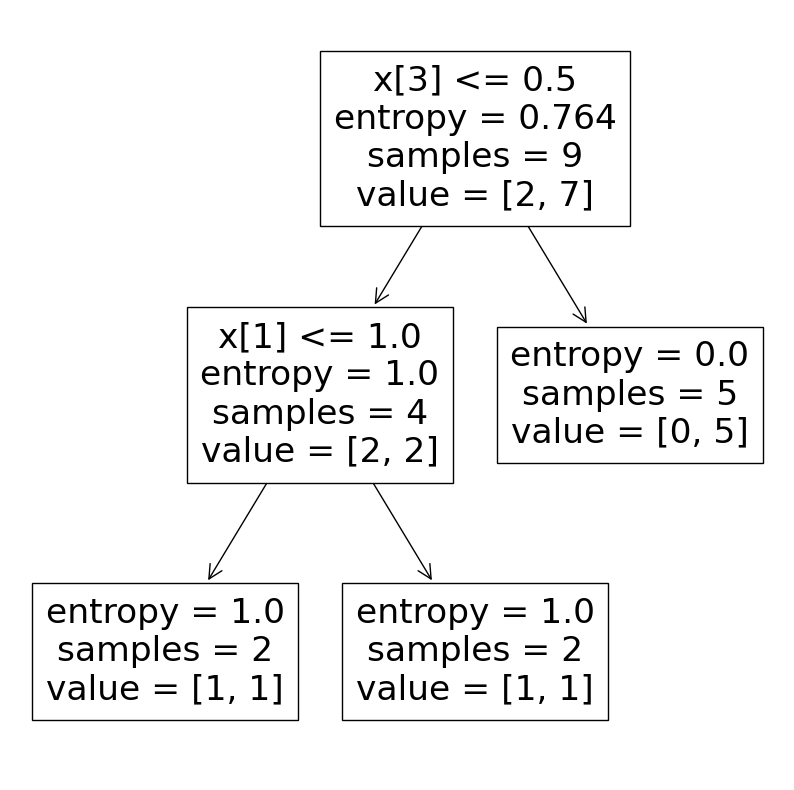

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_model)

In [21]:
print (df.columns)

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


[Text(0.6, 0.8333333333333334, 'wind <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]\nclass = Yes'),
 Text(0.4, 0.5, 'temp <= 1.0\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = No'),
 Text(0.2, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.6, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Yes')]

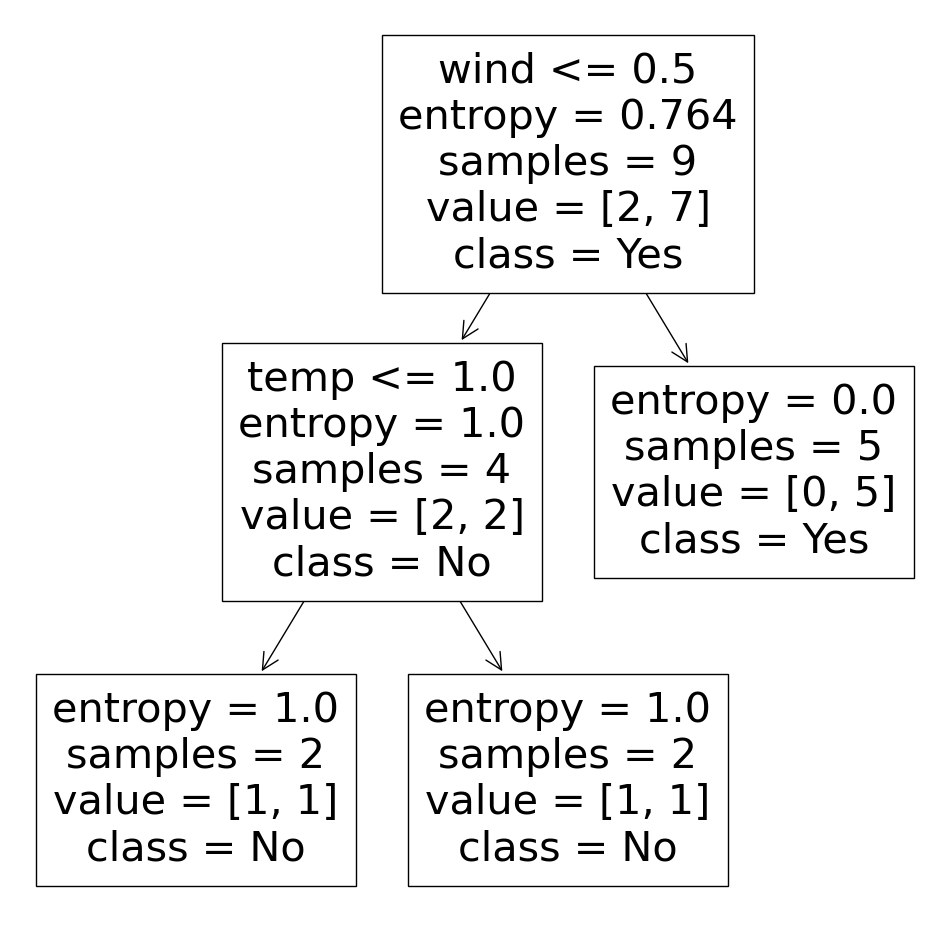

In [22]:
features = df.columns
class_name = {0: "No", 1: "Yes"}
plt.figure(figsize=(12,12))
tree.plot_tree(decision_tree_model, feature_names=features, class_names=class_name)

# Gini 계산

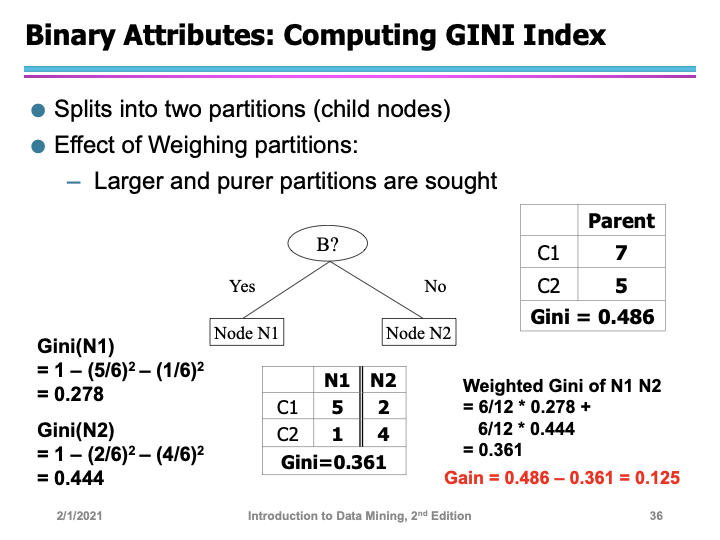

In [23]:
print (X_train)
print (y_train)

[[0 1 1 1]
 [0 0 1 0]
 [2 0 1 1]
 [1 2 0 1]
 [1 2 0 0]
 [2 2 1 0]
 [1 0 1 1]
 [1 0 1 0]
 [0 1 0 1]]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [24]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
train_df = pd.concat([X_train_df,y_train_df], axis=1)
train_df.columns = df.columns

In [25]:
print (train_df)

   outlook  temp  humidity  wind  play
0        0     1         1     1     1
1        0     0         1     0     1
2        2     0         1     1     1
3        1     2         0     1     1
4        1     2         0     0     0
5        2     2         1     0     1
6        1     0         1     1     1
7        1     0         1     0     0
8        0     1         0     1     1


In [26]:
h0p0 = train_df[(train_df["humidity"]==0) & (train_df["play"]==0)]
h0p1 = train_df[(train_df["humidity"]==0) & (train_df["play"]==1)]
h1p0 = train_df[(train_df["humidity"]==1) & (train_df["play"]==0)]
h1p1 = train_df[(train_df["humidity"]==1) & (train_df["play"]==1)]

## GiniN1 (humidity 0)

In [27]:
gini_humidity_0 = 1 - (len(h0p0)/(len(h0p0) + len(h0p1)))**2 - (len(h0p1)/(len(h0p0) + len(h0p1)))**2
print (gini_humidity_0)

0.4444444444444444


## GiniN2 (humidity 1)

In [28]:
gini_humidity_1 = 1 - (len(h1p0)/(len(h1p0) + len(h1p1)))**2 - (len(h1p1)/(len(h1p0) + len(h1p1)))**2
print (gini_humidity_1)

0.2777777777777777


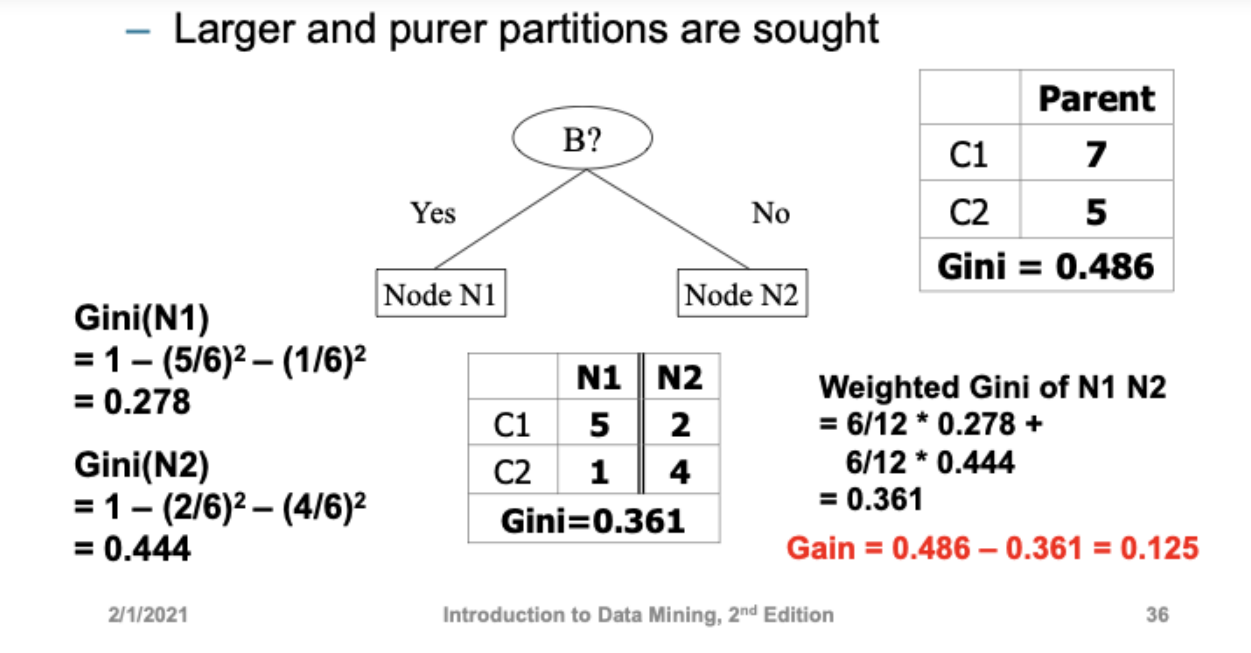

## Weighted Gini of N1 N2

In [29]:
((len(h0p0)+len(h0p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)) * gini_humidity_0) + ((len(h1p0)+len(h1p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)) * gini_humidity_1)

0.33333333333333326

# RedWine Quality Dataset + 추가로 Homework로 나갈 예정

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

다운 받고 불러와서 Decision Tree를 사용해서 분류 해볼것
Wine Quality(Class) 값은 0~10까지임.

따라서 2 class (x<5:0, x>=5:1) or 3 class 등으로 자유롭게 class를 나누어서 Decision Tree로 분류해보기

최소 10가지 이상의 다양한 종류의 실험을 해보고 가장 좋은성능을 가지는 실험 파라미터와 class 분류법을 찾기

 ex) 클래스 분류를 조정, Decision Tree 함수의 파라미터를 조정(Gini 계수, Entropy), Train/Test 나누는 비율 조정 등 